# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORTING DATASET

In [2]:
dat = pd.read_csv('Position_Salaries.csv')

In [3]:
x = dat.iloc[:, 1:-1].values
y = dat.iloc[:, -1].values

In [4]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
y = y.reshape(len(y), 1)

In [8]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# FEATURE SCALING

In [17]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
x = sc1.fit_transform(x)
y = sc2.fit_transform(y)

In [18]:
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model from the dataset.

In [20]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y.ravel())

SVR()

# PREDICTING THE RESULT


In [22]:
sc2.inverse_transform(regressor.predict(sc1.transform([[6.5]])))

array([170370.0204065])

# VISUALIZING THE RESULTS.

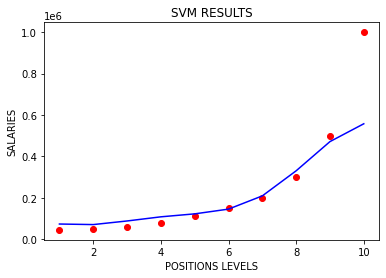

In [28]:
plt.scatter(sc1.inverse_transform(x), sc2.inverse_transform(y), color='red')
plt.plot(sc1.inverse_transform(x), sc2.inverse_transform(regressor.predict(x)), color='blue')
plt.title('SVM RESULTS')
plt.xlabel('POSITIONS LEVELS')
plt.ylabel('SALARIES')
plt.show()